In [1]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas
import seaborn
seaborn.set_context({"figure.figsize": (16, 8)})
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

In [2]:
def do_plots(species, label, root="../data", lengthticks=[3, 4, 5, 6],
             lengthticklabs=['1,000', '10,000', '100,000', '1,000,000'],
             lengthbins=numpy.linspace(2.75, 6.0, 40),
             gcbins=numpy.linspace(20, 80, 40)):
    ilocusdata = pandas.read_table('{}/{}/{}.iloci.tsv'.format(root, species, species))
    milocusdata = pandas.read_table('{}/{}/{}.miloci.tsv'.format(root, species, species))
    ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
    milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
    siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
    miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
    singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
    singleton_locuspos = [lp[6:-1] for lp in singleton_siloci['LocusPos']]
    milocus_siloci = siloci.loc[~(siloci.LocusPos.isin(singleton_locuspos))]
    fig, axes = plt.subplots(1, 2)
    ax1, ax2 = axes
    _ = ax1.hist(singleton_siloci['LogLength'], bins=lengthbins, alpha=0.5)
    _ = ax1.hist(milocus_siloci['LogLength'], bins=lengthbins, alpha=0.5)
    _ = ax1.set_title('siLocus Length ({})'.format(label))
    _ = ax1.set_xlabel('Length (bp)')
    _ = ax1.set_ylabel('Frequency')
    _ = ax1.legend(loc='upper right', labels=('Unmerged', 'Merged'))
    if lengthticks:
        _ = ax1.set_xticks(lengthticks)
    if lengthticklabs:
        _ = ax1.set_xticklabels(lengthticklabs)
    _ = ax2.hist(singleton_siloci['GCContent'] * 100, bins=gcbins, alpha=0.5)
    _ = ax2.hist(milocus_siloci['GCContent'] * 100, bins=gcbins, alpha=0.5)
    _ = ax2.set_title('siLocus Nucleotide Composition ({})'.format(label))
    _ = ax2.set_xlabel('% GC Content')
    _ = ax2.set_ylabel('Frequency')
    _ = ax2.legend(loc='upper right', labels=('Unmerged', 'Merged'))

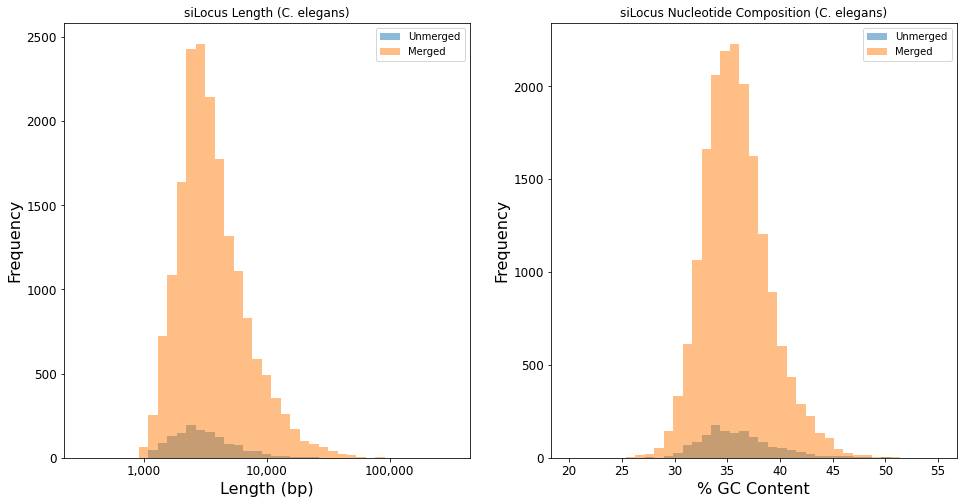

In [3]:
do_plots('Cele', 'C. elegans', "../data", lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(20, 55, 40))

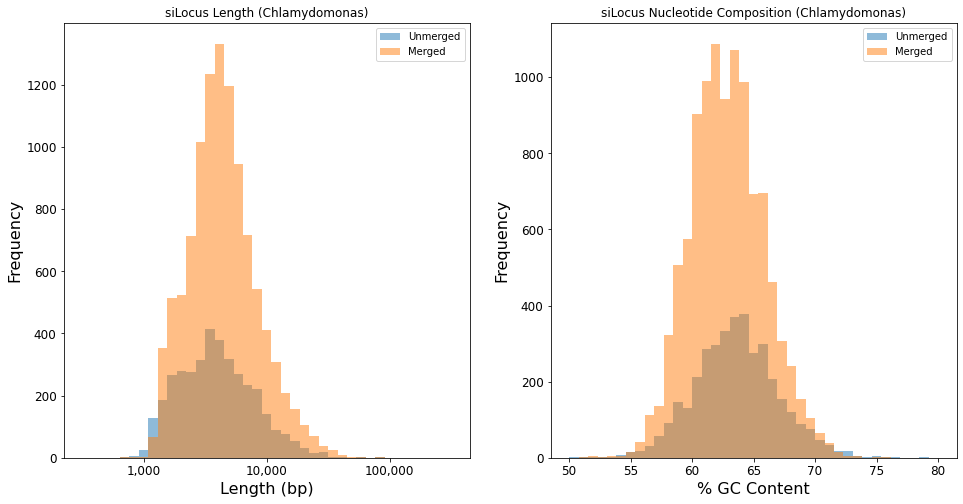

In [4]:
do_plots('Crei', 'Chlamydomonas', '../data', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(50, 80, 40))

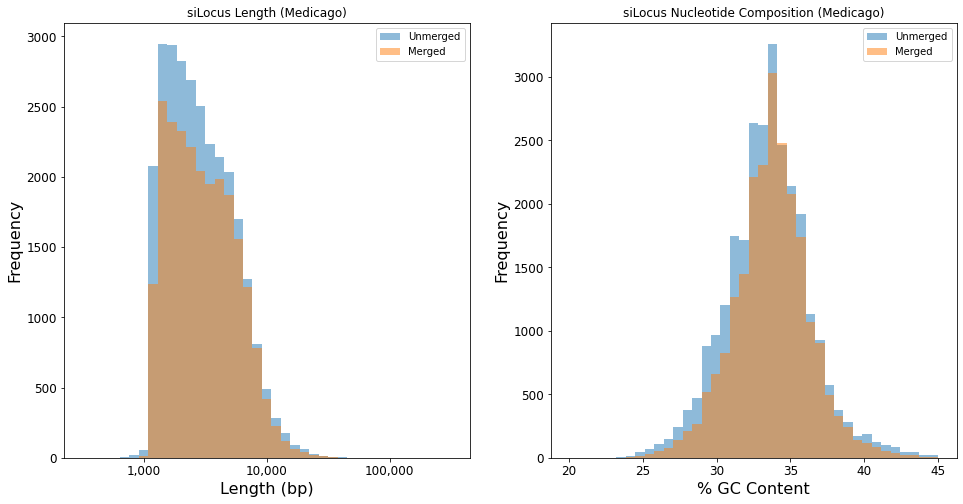

In [5]:
do_plots('Mtru', 'Medicago', lengthticks=[3, 4, 5], lengthticklabs=['1,000', '10,000', '100,000'],
         lengthbins=numpy.linspace(2.5, 5.5, 40), gcbins=numpy.linspace(20, 45, 40))

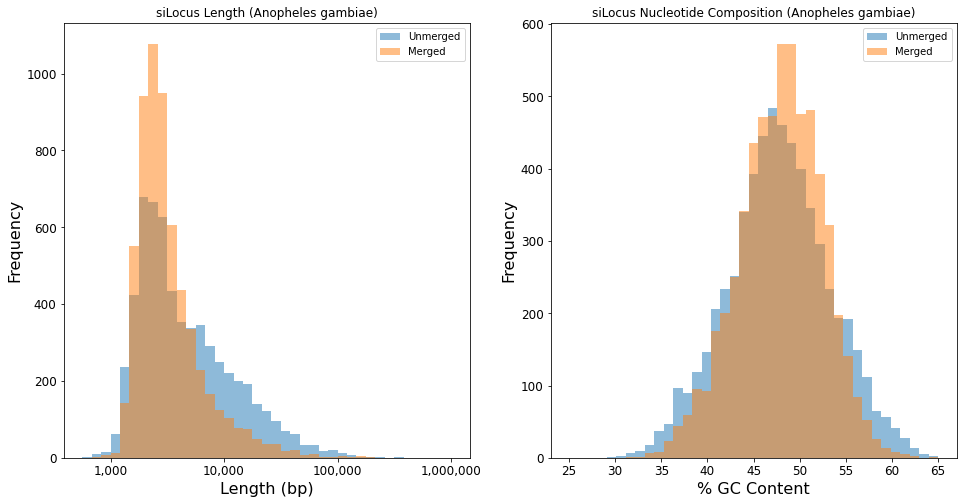

In [6]:
do_plots('Agam', 'Anopheles gambiae', gcbins=numpy.linspace(25, 65, 40))

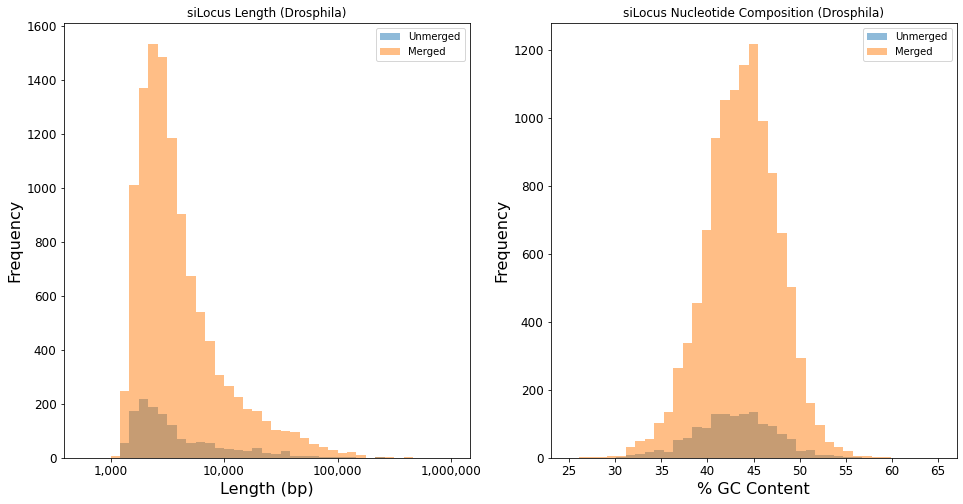

In [7]:
do_plots('Dmel', 'Drosphila', gcbins=numpy.linspace(25, 65, 40))

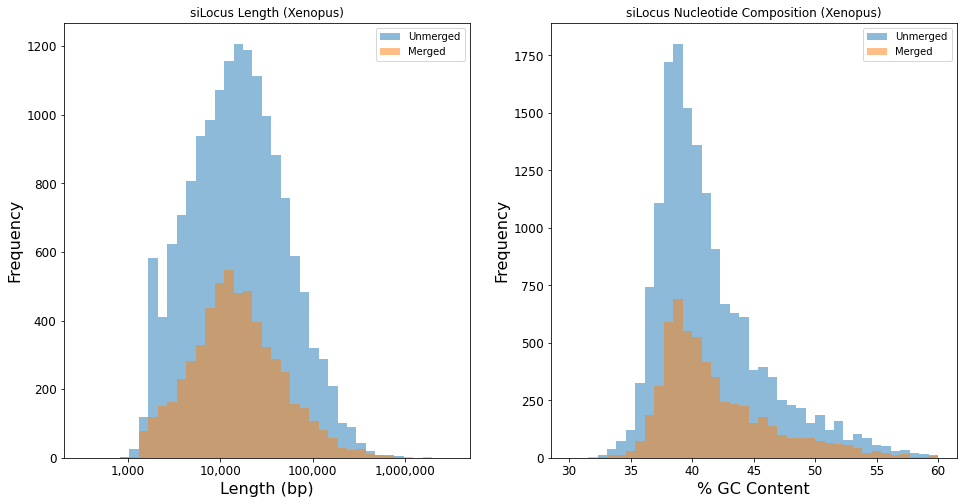

In [8]:
do_plots('Xtro', 'Xenopus', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 60, 40))

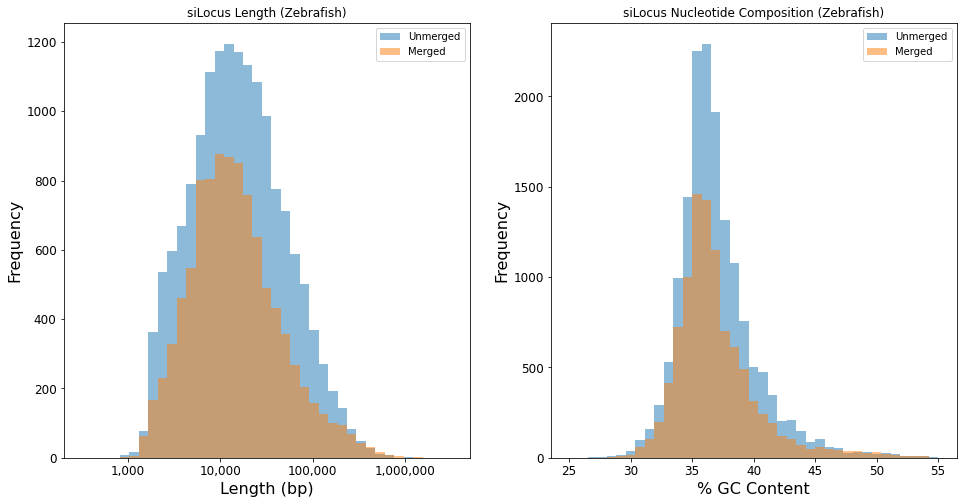

In [9]:
do_plots('Drer', 'Zebrafish', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(25, 55, 40))

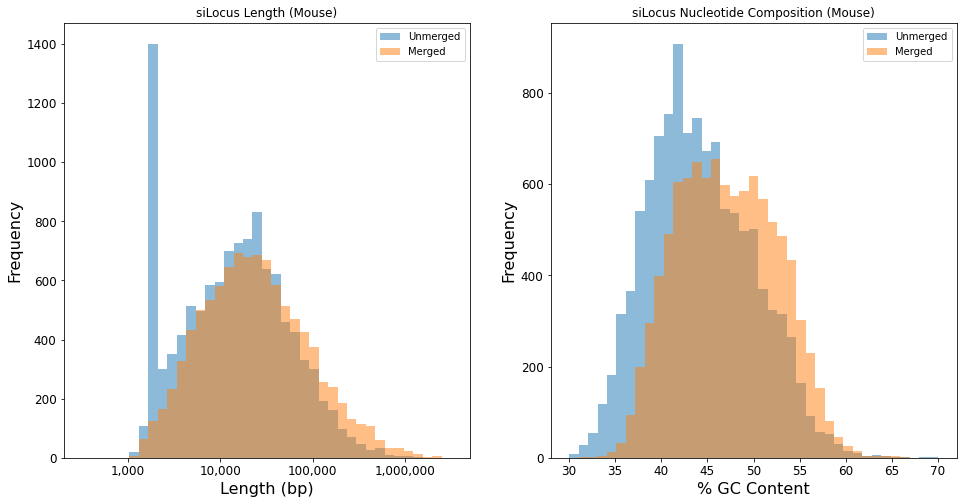

In [10]:
do_plots('Mmus', 'Mouse', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 70, 40))

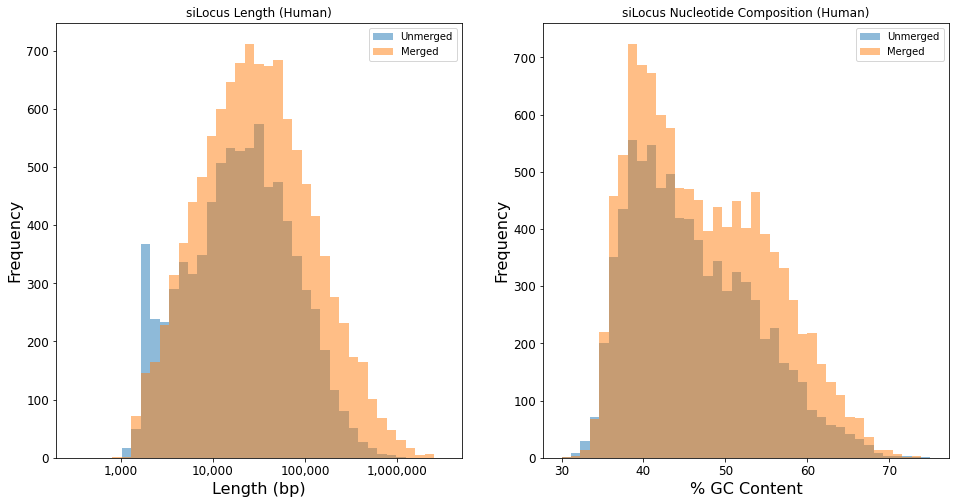

In [11]:
do_plots('Hsap', 'Human', lengthbins=numpy.linspace(2.5, 6.5, 40), gcbins=numpy.linspace(30, 75, 40))

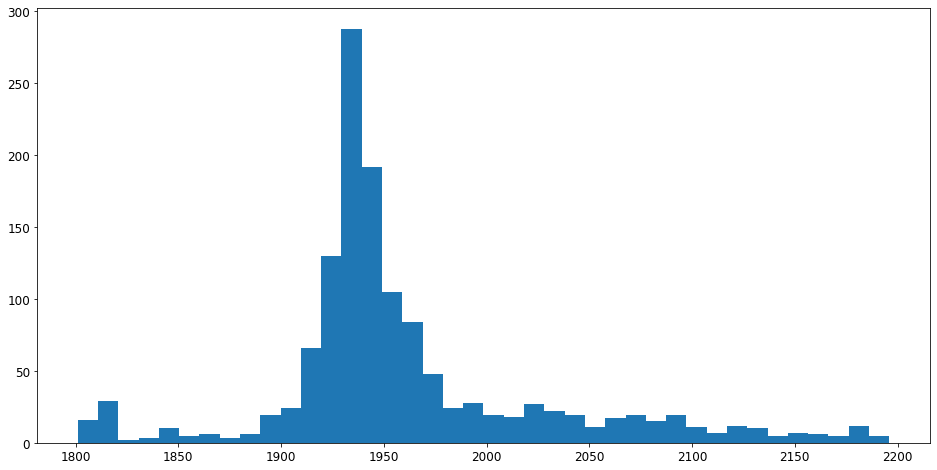

In [12]:
root = '../data'
species = 'Mmus'
ilocusdata = pandas.read_table('{}/{}/{}.iloci.tsv'.format(root,species, species))
milocusdata = pandas.read_table('{}/{}/{}.miloci.tsv'.format(root,species, species))
ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
peak = singleton_siloci.loc[(singleton_siloci.Length > 1800) & (singleton_siloci.Length < 2200)]
_ = plt.hist(peak['Length'], bins=40)

In [13]:
ioi = siloci.loc[(siloci.Length > 1920) & (siloci.Length < 1980)]
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
44534,Mmus,MmusILC-44535,NC_000080.6,NC_000080.6_50709832-50711755,1924,1924,0.378,-0.092,0.0,siLocus,1,False,NaN,3.284205
5231,Mmus,MmusILC-05232,NC_000068.7,NC_000068.7_86422219-86424174,1956,1956,0.371,0.015,0.0,siLocus,1,False,NaN,3.291369
22125,Mmus,MmusILC-22126,NC_000073.6,NC_000073.6_26266331-26268275,1945,1945,0.364,-0.068,0.0,siLocus,1,False,NaN,3.288920
18518,Mmus,MmusILC-18519,NC_000072.6,NC_000072.6_43216415-43218380,1966,1966,0.401,-0.099,0.0,siLocus,1,False,NaN,3.293584
54791,Mmus,MmusILC-54792,NC_000085.6,NC_000085.6_13704329-13706288,1960,1960,0.406,-0.025,0.0,siLocus,1,False,NaN,3.292256


In [14]:
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
54694,Mmus,MmusILC-54695,NC_000085.6,NC_000085.6_12267732-12269670,1939,1939,0.391,-0.051,0.0,siLocus,1,False,NaN,3.287578
26156,Mmus,MmusILC-26157,NC_000074.6,NC_000074.6_21286909-21288877,1969,1969,0.422,0.010,0.0,siLocus,1,False,NaN,3.294246
21965,Mmus,MmusILC-21966,NC_000073.6,NC_000073.6_23927886-23929857,1972,1972,0.362,-0.070,0.0,siLocus,1,False,NaN,3.294907
36351,Mmus,MmusILC-36352,NC_000077.6,NC_000077.6_73846685-73848623,1939,1939,0.367,0.103,0.0,siLocus,1,False,NaN,3.287578
49519,Mmus,MmusILC-49520,NC_000082.6,NC_000082.6_59109179-59111108,1930,1930,0.355,0.137,0.0,siLocus,1,False,NaN,3.285557


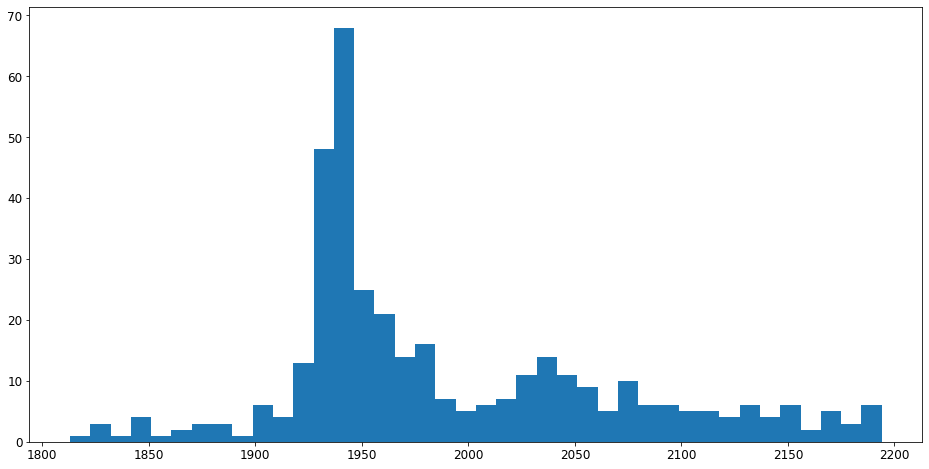

In [15]:
root = '../data'
species = 'Hsap'
ilocusdata = pandas.read_table('{}/{}/{}.iloci.tsv'.format(root,species, species))
milocusdata = pandas.read_table('{}/{}/{}.miloci.tsv'.format(root,species, species))
ilocusdata['LogLength'] = numpy.log10(ilocusdata['Length'])
milocusdata['LogLength'] = numpy.log10(milocusdata['Length'])
siloci = ilocusdata.loc[(ilocusdata.LocusClass == 'siLocus')]
miloci = milocusdata.loc[(milocusdata.LocusClass == 'miLocus')]
singleton_siloci = milocusdata.loc[(milocusdata.LocusClass == 'siLocus')]
peak = singleton_siloci.loc[(singleton_siloci.Length > 1800) & (singleton_siloci.Length < 2200)]
_ = plt.hist(peak['Length'], bins=40)

In [16]:
ioi = siloci.loc[(siloci.Length > 1920) & (siloci.Length < 1980)]
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
3771,Hsap,HsapILC-03772,NC_000001.11,NC_000001.11_158398022-158399966,1945,1945,0.394,0.050,0.0,siLocus,1,False,NaN,3.288920
33178,Hsap,HsapILC-33179,NC_000011.10,NC_000011.10_58214245-58216222,1978,1978,0.412,-0.084,0.0,siLocus,1,False,NaN,3.296226
32195,Hsap,HsapILC-32196,NC_000011.10,NC_000011.10_5300514-5302446,1933,1933,0.393,0.016,0.0,siLocus,1,False,NaN,3.286232
28536,Hsap,HsapILC-28537,NC_000009.12,NC_000009.12_104525753-104527709,1957,1957,0.400,0.009,0.0,siLocus,1,False,NaN,3.291591
32175,Hsap,HsapILC-32176,NC_000011.10,NC_000011.10_5058150-5060127,1978,1978,0.403,0.051,0.0,siLocus,1,False,NaN,3.296226


In [17]:
ioi.sample(n=5)

,Species,LocusId,SeqID,LocusPos,Length,EffectiveLength,GCContent,GCSkew,NContent,LocusClass,GeneCount,SeqUnannot,FlankGeneOrient,LogLength
28862,Hsap,HsapILC-28863,NC_000009.12,NC_000009.12_122628079-122630035,1957,0,0.456,-0.058,0.0,siLocus,1,False,NaN,3.291591
18537,Hsap,HsapILC-18538,NC_000005.10,NC_000005.10_181123857-181125804,1948,1948,0.476,0.056,0.0,siLocus,1,False,NaN,3.289589
24427,Hsap,HsapILC-24428,NC_000007.14,NC_000007.14_144073720-144075652,1933,0,0.424,-0.059,0.0,siLocus,1,False,NaN,3.286232
5692,Hsap,HsapILC-05693,NC_000001.11,NC_000001.11_247671618-247673541,1924,1924,0.394,0.117,0.0,siLocus,1,False,NaN,3.284205
32316,Hsap,HsapILC-32317,NC_000011.10,NC_000011.10_7824537-7826472,1936,1936,0.388,0.047,0.0,siLocus,1,False,NaN,3.286905
